# K-Means

*Alunos:* <br>
    Pedro Santos Oliveira <br>
    Vinícius Nascimento Silva <br>

## Exercício 1

a) Executar o algoritmo K-Means para obter 3 clusters das amostras presentes no arquivo "data2.mat".

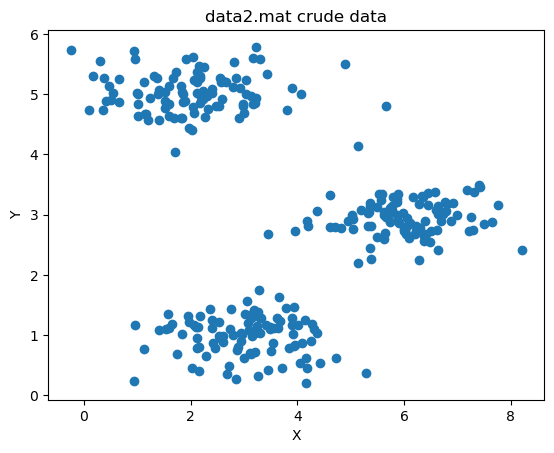

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# loadmat file to array
file = loadmat('Data/data2.mat')
data = np.array(file['X'])

# Plotting the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data2.mat crude data')
plt.show()

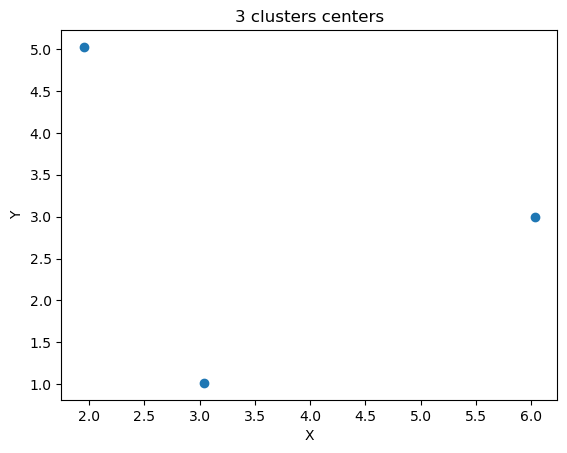

In [16]:
from sklearn.cluster import KMeans

# kmeans model
kmeans = KMeans(n_clusters=3).fit(data)

# Plotting centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3 clusters centers')
plt.show()

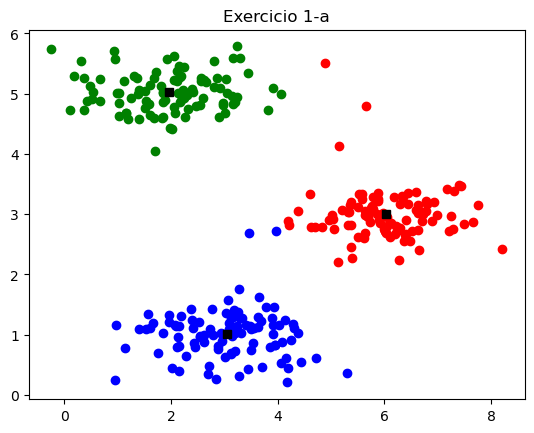

In [17]:
# define colors
color = ['red', 
         'green', 
         'blue', 
         'maroon', 
         'darkorange', 
         'navy',
         'pink',
         'aqua',
         'lime',
         'gold',
         'salmon',
         'gray',
         'olive',
         'magenta',
         'peru',
         'silver',
         'turquoise',
         'cornflowerblue', 
         'indigo', 
         'yellow']

def my_plot(predicts, title, centers=np.array([])):
    ax = plt.axes()
    
    # data to dict
    data_per_group = {}
    for group in set(predicts):
        data_per_group[group] = []
        for i in range(len(predicts)):
            if predicts[i] == group:
                data_per_group[group].append([data[i, 0], data[i, 1]])

    # plot data per group
    for group in data_per_group:
        for dat in data_per_group[group]:
            ax.plot(dat[0], dat[1], color[group], marker='o')

    # plot centers
    if not centers.size == 0:
        for center in centers:
            ax.plot(center[0], center[1], color='black', marker='s')

    ax.set_title(title)

    plt.show()

# plot predicts
predicts = kmeans.predict(data)
centers = kmeans.cluster_centers_
my_plot(predicts, 'Exercicio 1-a', centers)

b) Agora ajuste o algoritmo K-Means para diferentes números de clusters (1 a 20).

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


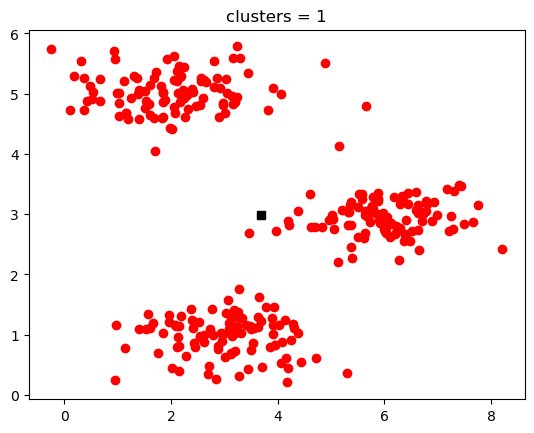

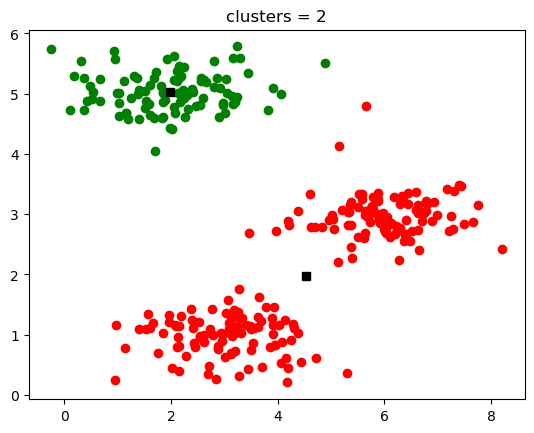

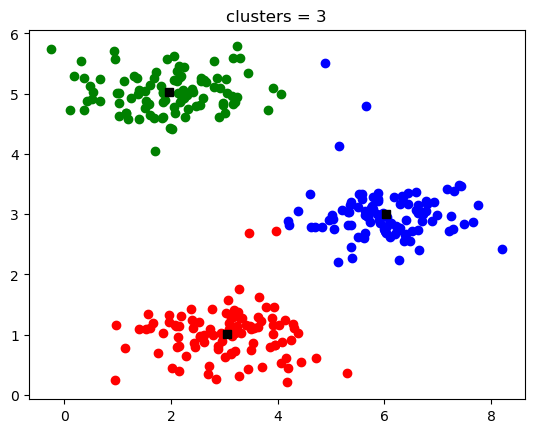

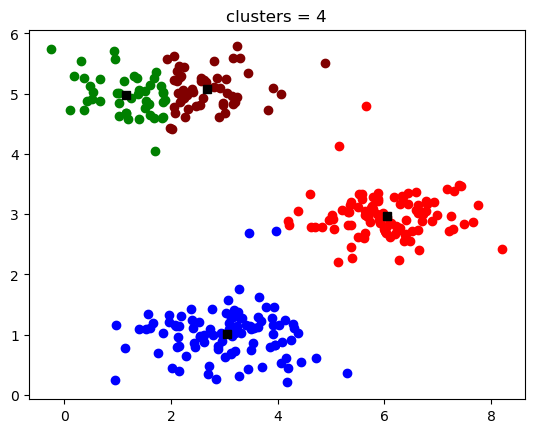

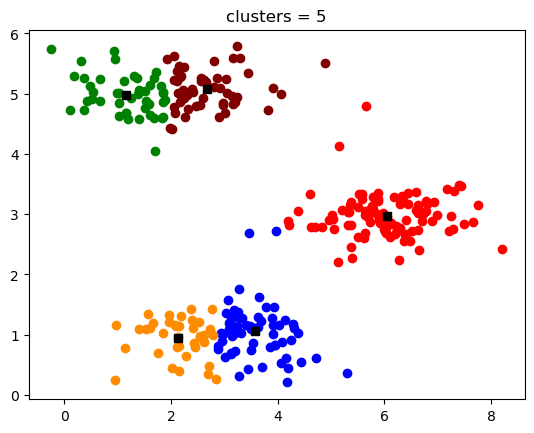

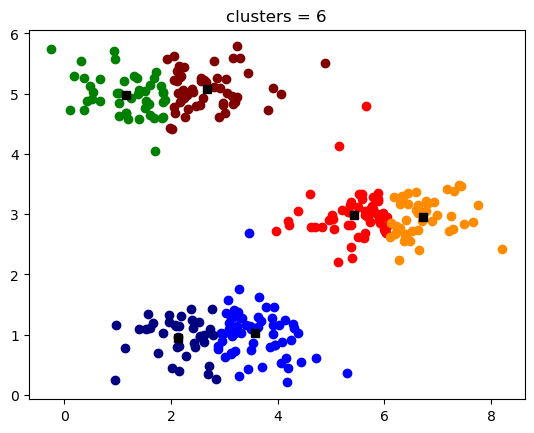

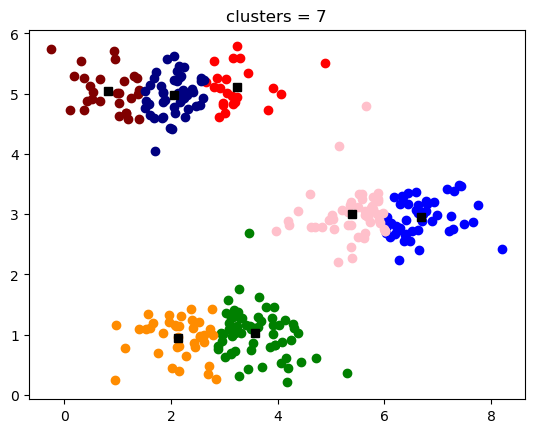

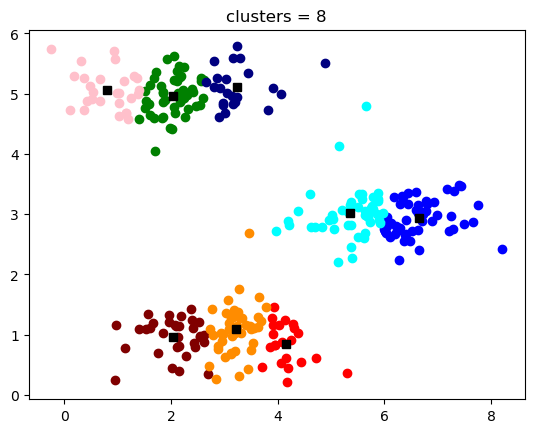

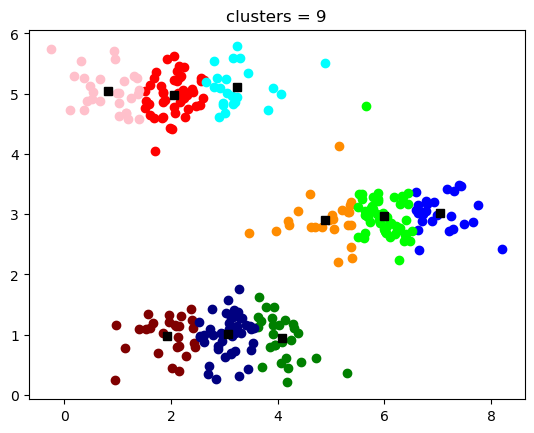

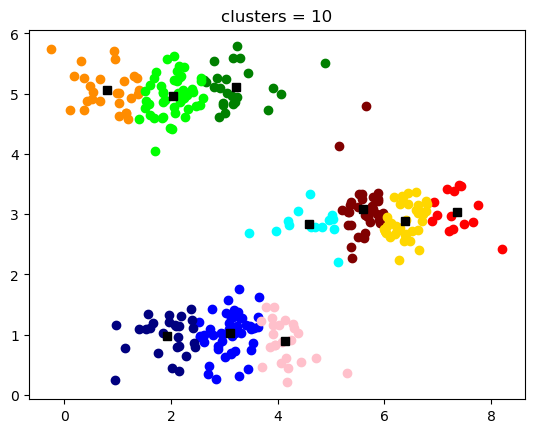

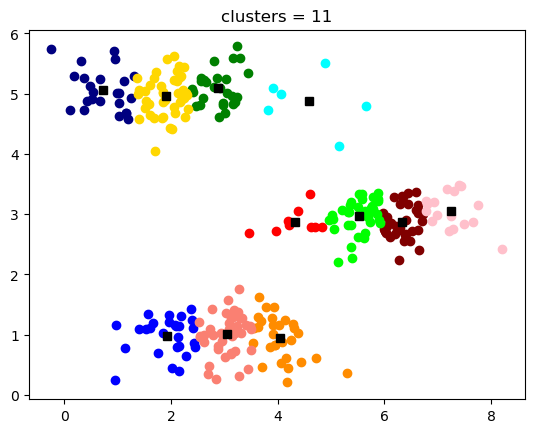

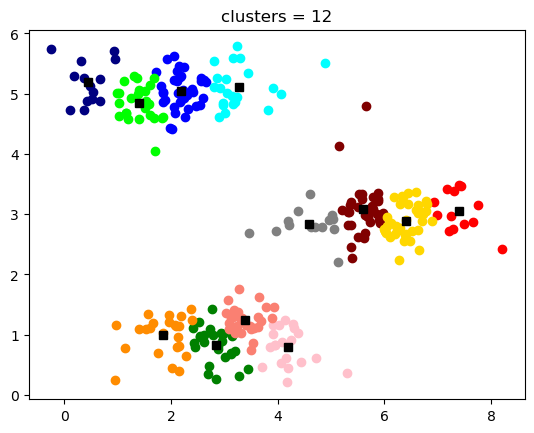

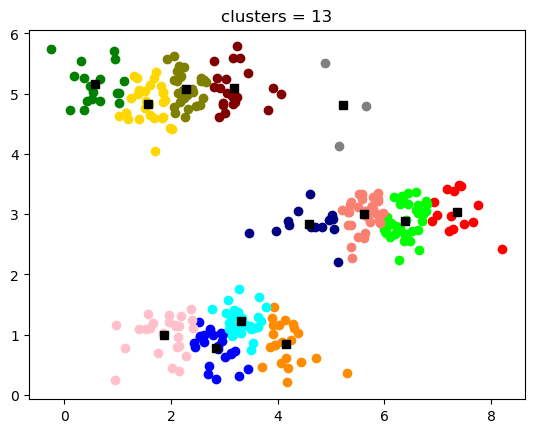

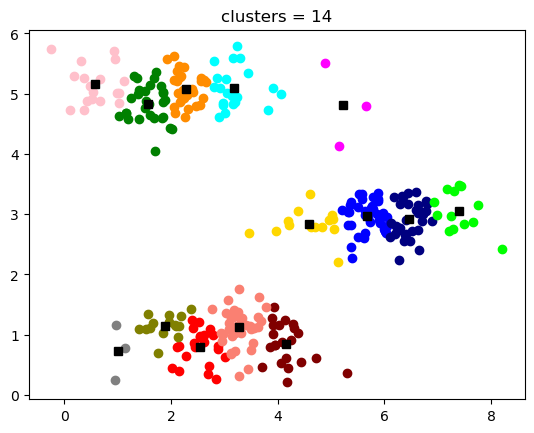

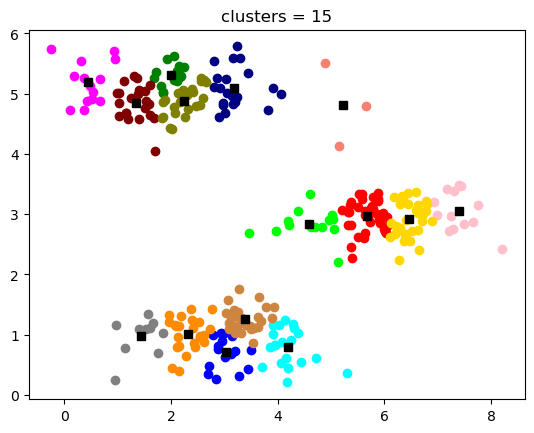

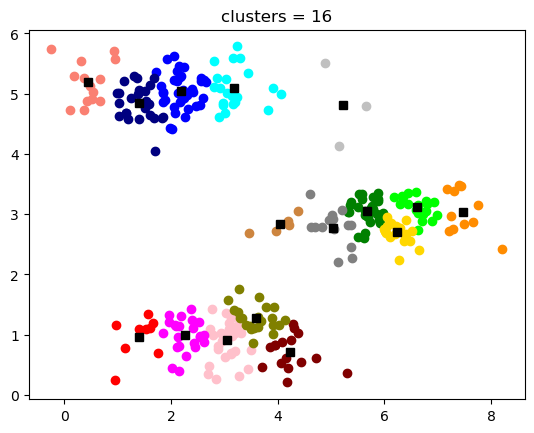

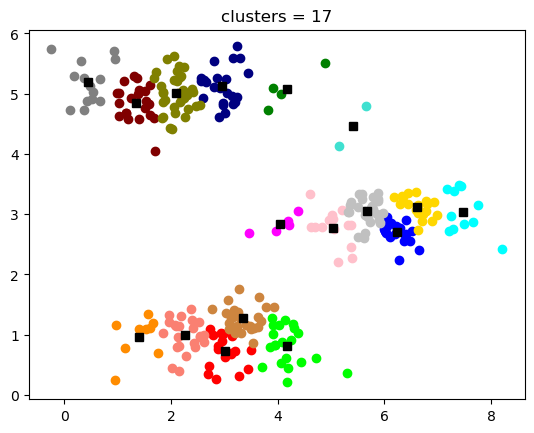

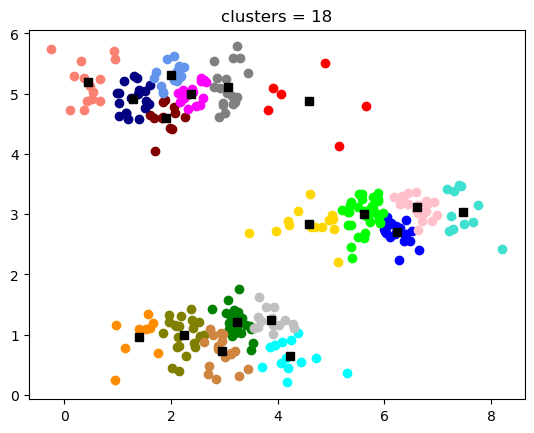

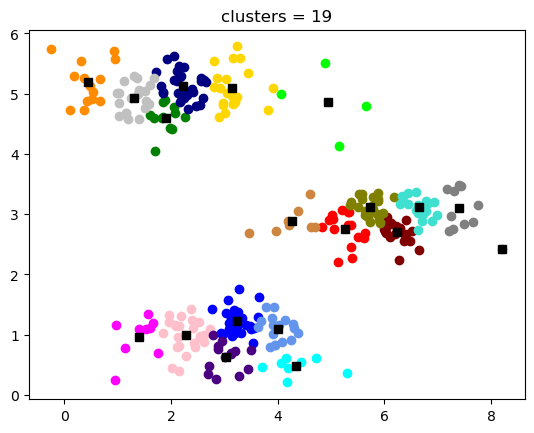

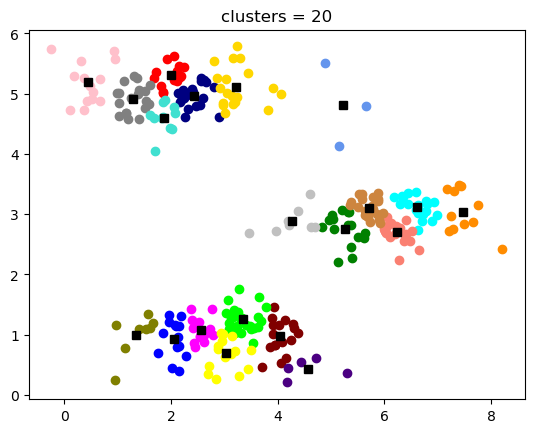

In [18]:
# kmeans for 1 a 20 models
kmeans_per_cluster = []
for i in range(1,21):
    kmeans_per_cluster.append(KMeans(n_clusters=i).fit(data))
    
    # plot predicts
    predicts = kmeans_per_cluster[i-1].predict(data)
    centers = kmeans_per_cluster[i-1].cluster_centers_
    my_plot(predicts, f'clusters = {i}', centers)


c) Para cada modelo, armazene o número de clusters e o valor da inércia (custo).

In [19]:
model_per_cluster = {}
for kmeans in kmeans_per_cluster:
    model_per_cluster[len(kmeans.cluster_centers_)] = kmeans.inertia_

for key in model_per_cluster:
    print(f'clusters: {key} \t Inertia: {model_per_cluster[key]}')

clusters: 1 	 Inertia: 1957.654720625167
clusters: 2 	 Inertia: 913.3192714747092
clusters: 3 	 Inertia: 266.65851965491936
clusters: 4 	 Inertia: 211.48222520142374
clusters: 5 	 Inertia: 161.26337347597646
clusters: 6 	 Inertia: 120.77282699388334
clusters: 7 	 Inertia: 102.48416990769465
clusters: 8 	 Inertia: 88.80429669785858
clusters: 9 	 Inertia: 76.21478801313583
clusters: 10 	 Inertia: 68.4789808492858
clusters: 11 	 Inertia: 62.0123361362089
clusters: 12 	 Inertia: 57.01344664027968
clusters: 13 	 Inertia: 51.06639316645904
clusters: 14 	 Inertia: 49.012745657090065
clusters: 15 	 Inertia: 44.93702450579862
clusters: 16 	 Inertia: 41.98627940618647
clusters: 17 	 Inertia: 39.155931719617065
clusters: 18 	 Inertia: 38.13825679376607
clusters: 19 	 Inertia: 35.5404809031145
clusters: 20 	 Inertia: 33.17809198099028


d) Plote a Inércia (custo) versus Nº de clusters. Parece haver um número ideal de cluster (método do cotovelo - elbow?

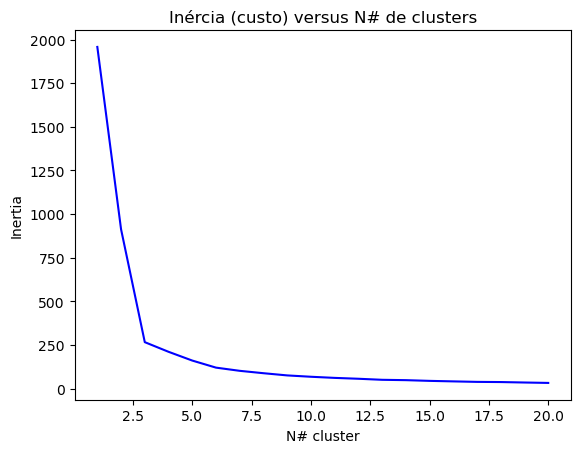

In [20]:
ax = plt.axes()

x = list(model_per_cluster.keys())
y = list(model_per_cluster.values())

ax.plot(x, y, 'blue')
ax.set_title('Inércia (custo) versus N# de clusters')
ax.set_xlabel('N# cluster')
ax.set_ylabel('Inertia')
plt.show()

O número 3 é a quantidade ideal de clusters para essa coleção.

e) Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical Agglomerative Clustering) com três clusters (escolha e teste diferentes tipos de linkage).

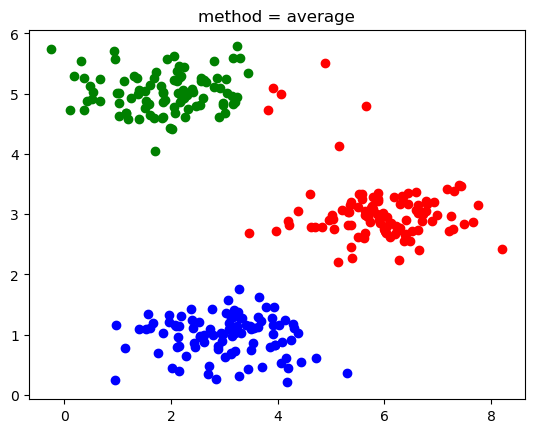

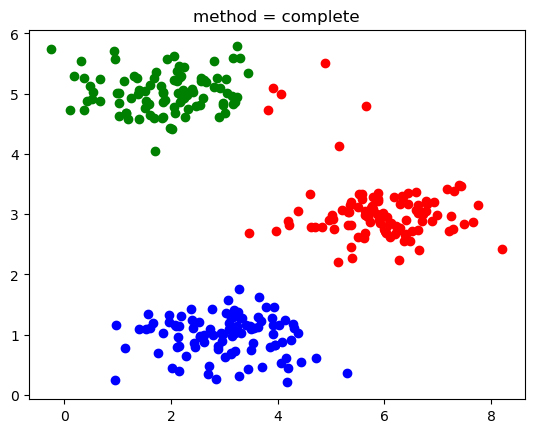

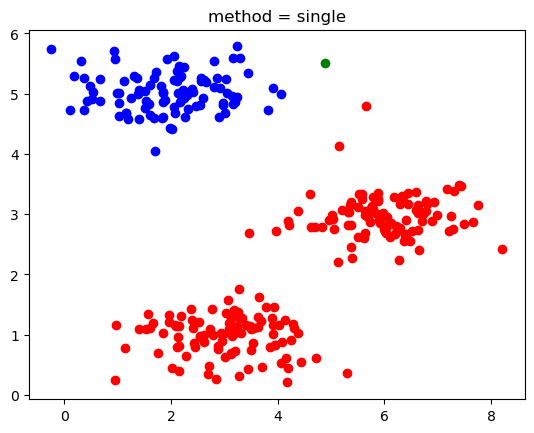

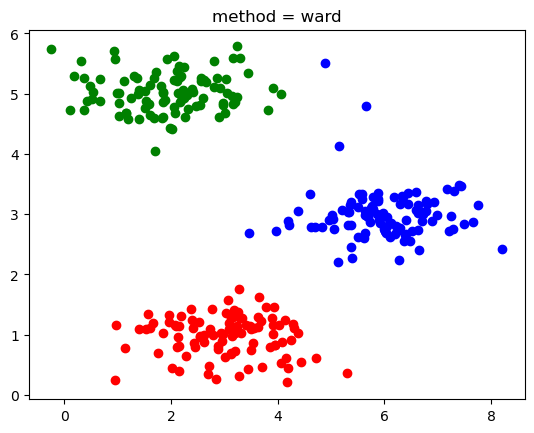

In [21]:
from sklearn.cluster import AgglomerativeClustering

methods = ['average', 'complete', 'single', 'ward']

hierarchies = []

for method in methods:
    agglomerative_model = AgglomerativeClustering(n_clusters=3, linkage=method).fit(data)
    result = agglomerative_model.fit_predict(data)
    
    my_plot(result, f'method = {method}')

f) Compare os resultados com os obtidos pelo k-means.

g) Visualize o dendrograma produzido pelo método de agrupamento aglomerativo Dica: O SciPy tem um módulo chamado cluster.hierarchy que contém as funções de linkage e dendrogram necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante.